# Entrenamiento 2: Principios de Optimización.

## Implementación: Búsqueda Local

In [1]:
#Importación de las librerias necesarias
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from math import cos, sin, pi 

**INCISO B**: 	Implemente una   función en Python llamada evaluar_indice que  reciba como parámetro una tupla con la coordenada $(x,y)$ y retorne el valor del índice para dicha coordenada. 

In [2]:
#TODO
def evaluar_indice(coor:tuple):
    x = coor
    return 95*(x[0]**2 *x[1] - 9)**2 + 130*(x[0] + x[1]**2 - 12)**2

**INCISO C:** Implemente una función en Python llamada generar_radar que reciba como parámetro una tupla con las coordenadas actuales $(x^t, y^t)$ y la longitud $\lambda$ y retorne las 8 coordenadas vecinas en una lista. 

In [3]:
#TODO
def generar_radar(coor: tuple, lbd: float):
    x, y = coor
    coor1, coor2, coor3, coor4 = (x+lbd,y), (x-lbd,y), (x,y+lbd), (x,y-lbd)
    coor5, coor6, coor7, coor8 = (x+lbd*cos(pi/4),y+lbd*sin(pi/4)), (x+lbd*cos(pi/4),y-lbd*sin(pi/4)), \
    (x-lbd*cos(pi/4),y+lbd*sin(pi/4)), (x-lbd*cos(pi/4),y-lbd*sin(pi/4))
    z=[coor1, coor2, coor3, coor4, coor5, coor6, coor7, coor8]

    return z

**INCISO D:** Implemente una función en Python llamada evaluar_factibilidad que reciba como parámetro una tupla con la coordenada $(x,y)$ y retorne True en caso de que se encuentre dentro de la región de estudio (cumpla todas las restricciones) y False de lo contrario.

In [4]:
#TODO
def evaluar_factibilidad(coor: tuple):
    if coor[0] < -4: return False
    if coor[1] < -7 or coor[1] > 5: return False
    if coor[0]+0.5*coor[1] > 7 or coor[0]-0.3*coor[1] > 7: return False
    return True


**INCISO E:** Implemente una función en Python llamada encontrar_mejor_coor que reciba como parámetro un diccionario donde las llaves son coordenadas; 
y retorne la coordenada con menor índice y su índice. En esta función, 
debe evaluar si el diccionario que entra por parámetro está vacío, en cuyo 
caso deberá retornar False

In [5]:
#TODO
def encontrar_mejor_coor(my_dict: dict):
    if len(my_dict.keys()) != 0:
        # min_val, min_coor = 1e9, tuple()
        # for key, value in radar.items():
        #     if value < min_val:   min_coor, min_val = key, value     
        min_coor = min(my_dict, key = my_dict.get)
        min_val = my_dict[min_coor]
        return (min_coor, min_val)
    else:
        return False

**NOTA:** A continuación se encuentra implementado el método de búsqueda local, el cual utilizará las funciones previamente implementadas para realizar el proceso de búsqueda local (corra esta celda antes de continuar con la implementación asegurandose de haber cumplido con los TODO previos).

In [6]:
#################################################
########### Método de búsqueda local ############
#################################################

# INCISO F. 
def busqueda_local(coord_ini: tuple, lbd: float):
    ### Incialización 
    ubicacion_actual = coord_ini
    objetivo_actual = evaluar_indice(ubicacion_actual)
    hay_mejora = True

    steps = [ubicacion_actual]  

    ### Proceso iterativo
    while hay_mejora:
        
        mejor_objetivo = objetivo_actual

        # Generar las ubicaciones del radar
        radar = generar_radar(ubicacion_actual, lbd)
        my_dict = {}

        # Guardar las ubicaciones factibles con sus índices
        for coor in radar:
            if evaluar_factibilidad(coor):
                nuevo_objetivo = evaluar_indice(coor)
                my_dict[coor] = nuevo_objetivo

        # Buscar la mejor ubicación del radar y actualizar la posición
        res = encontrar_mejor_coor(my_dict)
        if res != False and res[1] < mejor_objetivo:
            ubicacion_actual = res[0]
            objetivo_actual = res[1]
            steps.append(ubicacion_actual)
         
        # Criterio de parda del proceso iterativo
        else:
            hay_mejora = False
   
    #################################################
    ############### Resumen del método ##############
    #################################################
    print('\n######## Proceso iterativo de búsqueda local finalizado ########\n')
    print(f'Para la coordenada inicial {coor_inicial} y un lambda de {lbd}:\n')
    print(f'Número de iteraciones: {len(steps)}')
    print(f'La mejor ubicación encontrada fue: ({round(ubicacion_actual[0],3)},{round(ubicacion_actual[1],3)})')
    print(f'El mejor índice encontrado fue: {round(objetivo_actual,5)}\n')
    
    return steps

Determine las coordenadas iniciales $(x^0, y^0)$ y distancia del radar cuadrado de búsqueda (lbd)

In [7]:
#TODO
coor_inicial = (-4,-1)
lbd = 0.01

Invoque el método de búsqueda local utilizando los argumentos definidos en la celda anterior.

In [8]:
#TODO
steps = busqueda_local(coor_inicial, lbd)


######## Proceso iterativo de búsqueda local finalizado ########

Para la coordenada inicial (-4, -1) y un lambda de 0.01:

Número de iteraciones: 570
La mejor ubicación encontrada fue: (-1.56,3.68)
El mejor índice encontrado fue: 0.21276



Grafique el resultado de busqueda corriendo la celda que se muestra a continuación

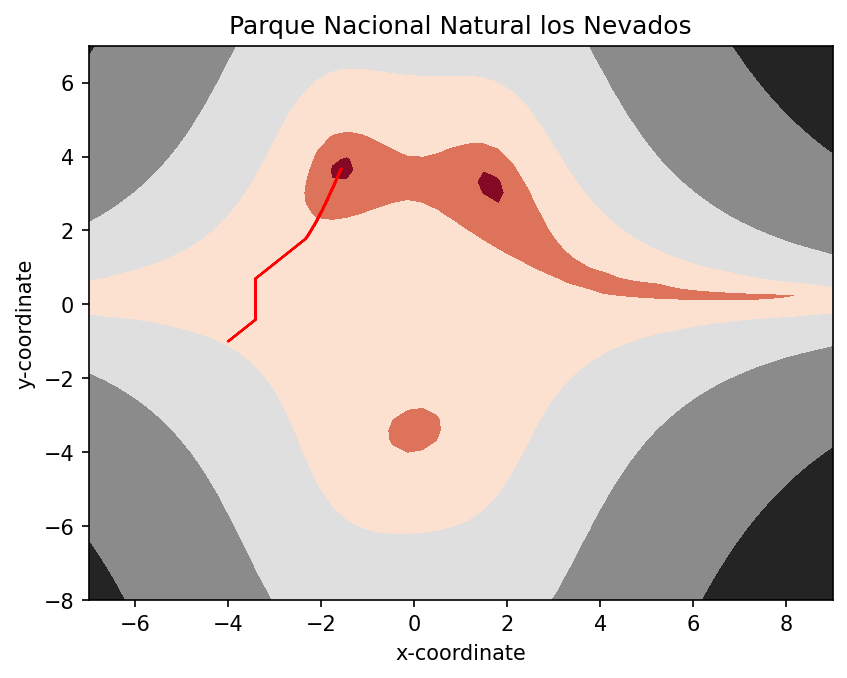

In [9]:
### Graficar el resultado
x_1, x_2 = np.linspace(-7, 9, 50), np.linspace(-8, 7, 50)
X, Y = np.meshgrid(x_1, x_2)
Z = evaluar_indice([X, Y])

mpl.rcParams['figure.dpi'] = 150
arrow_s = {0.5: 0.1, 0.1: 0.0005, 0.01: 0.0005}

# plot the contour
plt.contourf(X, Y, Z, cmap='RdGy', norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
for i in range(1,len(steps)):
    x, y,  = round(steps[i-1][0],2), round(steps[i-1][1],2)
    dx, dy = round(steps[i][0],2) - x, round(steps[i][1],2) - y
    if lbd in arrow_s.keys():
        plt.arrow(x, y, dx, dy , color = 'red', head_width = arrow_s[lbd])
    else:
        plt.arrow(x, y, dx, dy , color = 'red')

# add axis titles
plt.xlabel('x-coordinate'); plt.ylabel('y-coordinate')
plt.title("Parque Nacional Natural los Nevados")

plt.show()